In [25]:
import json
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime

In [26]:
with open("../data/log_meteo_agde__infoclimat.json") as f:
    dat = json.load(f)
dat = dat['hourly']['000F3']

In [27]:
dat[2]

{'id_station': '000F3',
 'dh_utc': '2022-01-06 00:20:00',
 'temperature': '5.9',
 'pression': '1015.4',
 'humidite': '52',
 'point_de_rosee': '-3.3',
 'vent_moyen': '8.3',
 'vent_rafales': None,
 'vent_direction': '305',
 'pluie_3h': None,
 'pluie_1h': None}

In [28]:
temp = { datetime.strptime(dat[i]["dh_utc"], "%Y-%m-%d %H:%M:%S"): float(dat[i]["temperature"])
            for i in range(len(dat))
            if dat[i]["temperature"]
       }

def _read_pluie(val):
    if val == None:
        return 0
    return float(val)

pluie = {
    datetime.strptime(dat[i]["dh_utc"], "%Y-%m-%d %H:%M:%S"): _read_pluie(dat[i]["pluie_3h"])
            for i in range(len(dat))
}

In [29]:
t0 = datetime(2022,4,1)
t1 = datetime(2022,10,31)
def _date_ok(t):
    return t >= t0 and t <= t1 and t.minute == 0 # and t.hour in [0,3,6,9,12,15,18,21]
temp = {k:temp[k] for k in temp if _date_ok(k)}
pluie = {k:pluie[k] for k in pluie if _date_ok(k)}

In [30]:
# max de température / jour
tmps_max = {}
for k in temp:
    kd = k.strftime("%d/%m/%Y")
    if kd not in tmps_max:
        tmps_max[kd] = temp[k]
    elif temp[k] > tmps_max[kd]:
        tmps_max[kd] = temp[k]

In [31]:
# cumul de pluie / jour
pluie_cum = {}
for k in pluie:
    kd = k.strftime("%d/%m/%Y")
    if kd not in pluie_cum:
        pluie_cum[kd] = pluie[k]
    else:
        pluie_cum[kd] += pluie[k]

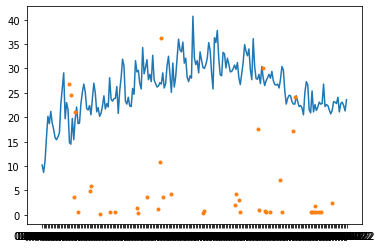

In [32]:
plt.plot([k for k in tmps_max], [tmps_max[k] for k in tmps_max])
plt.plot([k for k in pluie_cum if pluie_cum[k] > 0], [pluie_cum[k] for k in pluie_cum if pluie_cum[k] > 0], '.')

In [33]:
print([int(round(tmps_max[k])) for k in tmps_max])

[10, 9, 11, 16, 20, 19, 21, 19, 18, 16, 15, 16, 17, 23, 26, 29, 20, 23, 22, 15, 14, 20, 15, 20, 22, 19, 19, 23, 25, 27, 25, 22, 22, 22, 20, 24, 27, 25, 21, 22, 20, 21, 22, 24, 22, 23, 22, 28, 24, 23, 24, 24, 26, 21, 25, 28, 32, 30, 23, 23, 24, 22, 22, 26, 25, 32, 29, 30, 27, 26, 34, 29, 30, 32, 28, 29, 27, 33, 28, 27, 26, 26, 27, 27, 29, 26, 27, 31, 32, 29, 25, 31, 26, 28, 32, 36, 34, 33, 35, 31, 32, 28, 27, 28, 28, 41, 32, 31, 32, 29, 33, 32, 30, 30, 31, 32, 35, 34, 29, 26, 36, 35, 38, 32, 29, 28, 33, 33, 30, 32, 31, 29, 29, 30, 31, 30, 31, 28, 27, 29, 31, 35, 34, 33, 34, 30, 28, 36, 30, 28, 28, 29, 27, 30, 28, 26, 28, 28, 29, 28, 29, 28, 27, 27, 27, 26, 28, 30, 30, 25, 23, 24, 24, 24, 23, 23, 23, 24, 23, 22, 22, 22, 20, 25, 27, 27, 22, 21, 25, 21, 23, 21, 22, 23, 23, 23, 27, 22, 23, 22, 22, 21, 21, 23, 23, 23, 24, 21, 23, 23, 22, 21, 24]


In [34]:
print([int(round(pluie_cum[k])) for k in pluie_cum])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 25, 0, 4, 21, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 11, 36, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 1, 0, 0, 30, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 7, 1, 0, 0, 0, 0, 0, 0, 0, 17, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [37]:
len(pluie_cum)

213

214

In [38]:
[k for k in tmps_max][-1]

'30/10/2022'